In [1]:
import jieba 
import wordcloud 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# -*- coding:utf-8 -*-
from os import path
from PIL import Image
#from scipy.misc import imread   #读取图片
from wordcloud import WordCloud,ImageColorGenerator

In [2]:
rank = []
img = Image.open(r'apple.png')
mask = np.array(img)
df = pd.read_excel('JDComments.xlsx')[['评论内容']]
df.head(5)

,评论内容
0,外形外观：直角边框经典设计，手感非常好。不锈钢边框很有质感\n屏幕音效：iPhone屏幕一如...
1,外形外观：用了一个多月再来评价，手机到手完美，没有网上说的那些问题\n屏幕音效：顶级屏幕显示...
2,13香，13pro max真香。\n外形外观：霸气外露\n屏幕音效：这个音响效果很好(喜欢音...
3,外形外观：和12pro max的外观差不多\n屏幕音效：120赫兹的高刷屏很不错，确实比较快...
4,外形外观：非常漂亮！比11款漂亮多了，就喜欢这种反正\n屏幕音效：很不错\n拍照效果：太清晰...


In [3]:
df.describe()

,评论内容
count,1000
unique,1000
top,30号抢到的7号收到货，充电发热，晚上不玩也会掉4%的电量，充电发烫！其他没啥问题！全是安全...
freq,1


In [4]:
#查看默认评价
df[df['评论内容'] == '此用户未填写评价内容']

,评论内容


In [5]:
#删除默认评价
df.drop(df[df['评论内容']=="此用户未填写评价内容"].index,inplace=True)
print(len(df[df['评论内容']!=""])) #统计有效评论数

1000


In [6]:
#导入数据
data = df['评论内容']
data_list = data.values.tolist()
data_str = ' '.join(data_list) 

In [7]:
with open("cn_stopwords.txt") as f: 
    stopwords = f.read() 
    wordlist = jieba.lcut(data_str)
    words = [] 
    for word in wordlist: 
        if len(word)>1 and word not in stopwords: 
            words.append(word)
            rank.append({"word":word,"count":1})

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/6d/vc_yc6j568bd0jtt06f_m3y40000gn/T/jieba.cache
Loading model cost 0.453 seconds.
Prefix dict has been built successfully.


In [8]:
#查看单词排行，看是否需要添加停用词
df = pd.DataFrame(rank)
dfword = df.groupby('word')['count'].sum()
dfword2 = dfword.sort_values(ascending=False)  #降序排序
#dfword2.head(50)

In [9]:
#删除无用变量，节省内存
del df,dfword,dfword2

In [10]:
wc = wordcloud.WordCloud(
    background_color='white', # 设置背景颜色
    font_path='/System/Library/Fonts/PingFang.ttc', # 设置字体格式
    width=800,
    height=800,
    random_state=30,
    mask=mask, # 设置背景图
    max_words=200, # 最多显示词数
    max_font_size=100 , # 字体最大值
    scale=32  # 调整图片清晰度，值越大越清楚
)

In [11]:
#生成词云
wc.generate(' '.join(words))

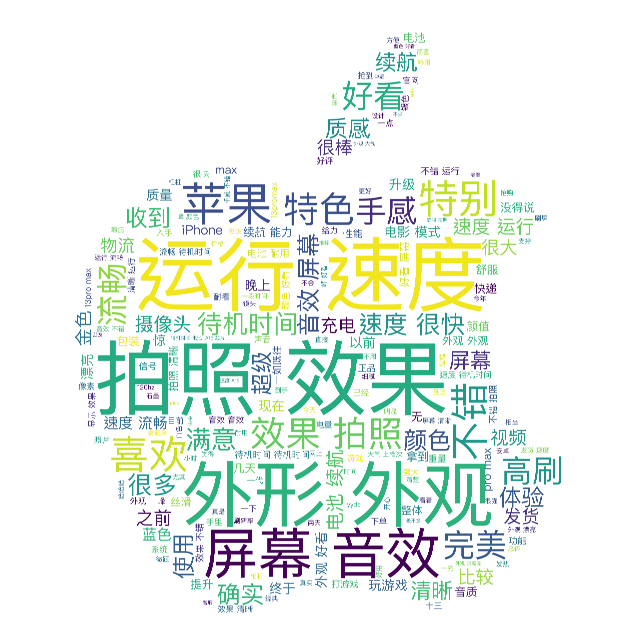

In [12]:
#显示词云
plt.figure(figsize=(8,4),dpi=200)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [13]:
#保存词云
wc.to_file(r'wordcloud.png')   #保存图片